<a href="https://colab.research.google.com/github/DAN-MASH/CovidProject/blob/main/customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [7]:
churn = pd.read_csv('Churn_Modelling.csv')

In [8]:
churn.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
#Overview of dataset
churn.shape

(10000, 14)

In [10]:
#overview of the variables
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
null_value = churn.isnull().sum()
null_value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
#duplicated
churn.duplicated().sum()

0

In [13]:
#churn.CreditScore['Exited']

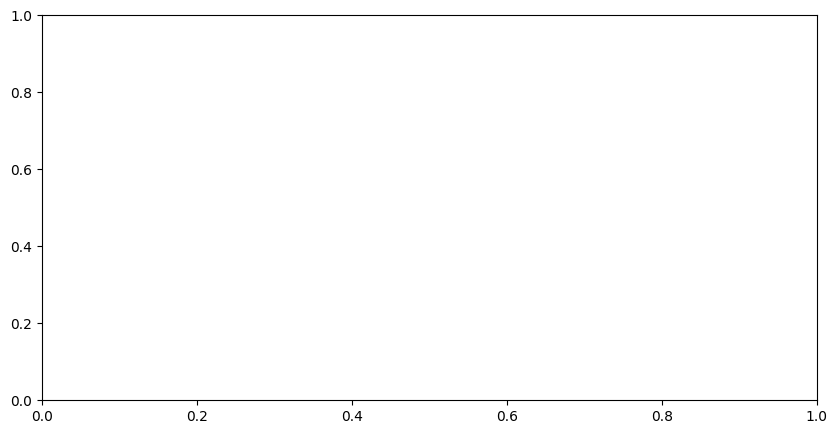

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(X=churn['Exited'])
plt.show()

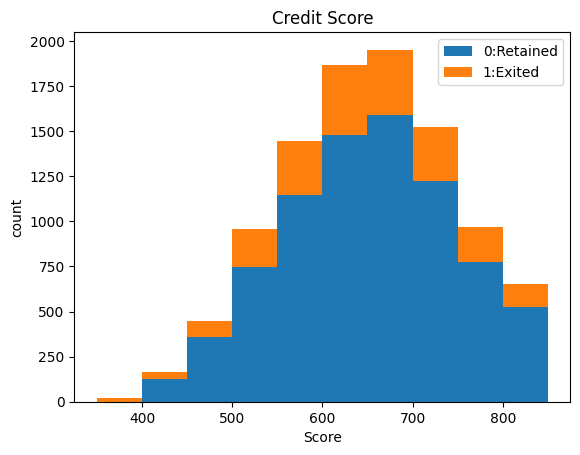

In [15]:
score = churn.groupby('Exited')['CreditScore'].apply(list)
plt.hist(score, stacked=True)
plt.legend(['0:Retained','1:Exited'])
plt.title('Credit Score')
plt.xlabel('Score')
plt.ylabel('count')
plt.show()

In [16]:
score

Exited
0    [608, 699, 850, 822, 501, 684, 528, 497, 476, ...
1    [619, 502, 645, 376, 653, 510, 591, 475, 465, ...
Name: CreditScore, dtype: object

In [17]:
fig = px.histogram(churn, x="CreditScore", color="Exited",
                 title="Distribution of Credit Score by Exited",
                 labels={"Exited": "Exited", "CreditScore": "Credit Score"},
                 nbins=10)

fig.show()

In [18]:
churn.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [19]:

churn['Balance'].mean()

76485.889288

In [20]:
#Modify the balance column that has null values
bal = (churn['Balance']==0).value_counts()
bal

Balance
False    6383
True     3617
Name: count, dtype: int64

In [21]:
bal2 = churn['Balance']

In [22]:
bal2

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [23]:
for bal in range (len(churn['Balance'])):
  if bal==0:
    churn['Balance'] = churn['Balance'].replace(0, churn['Balance'].mean()).astype('int64')

In [24]:
bal2.value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [25]:
for bal in bal2:
  if bal==0:
    churn['Balance'] = churn['Balance'].replace(0, churn['Balance'].mean()).astype('int64')

# for i in range(len(bal2)):
#   if bal2[i] == 0:
#     bal2[i] = churn['Balance'].mean()
# churn['Balance'] = bal2


In [26]:
churn['Balance'].value_counts()

Balance
76485     3617
105229       3
121063       3
109528       2
79259        2
          ... 
104158       1
98903        1
121164       1
64667        1
130142       1
Name: count, Length: 6205, dtype: int64

In [27]:
#Assess geographical distribution of customers
geo_dist=churn['Geography'].value_counts()
geo_dist

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

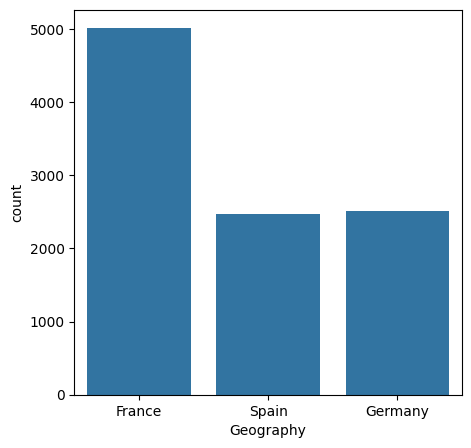

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn,x='Geography')
plt.show()

In [29]:
churn.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

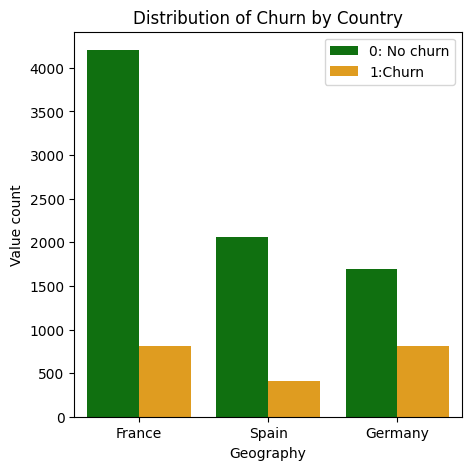

In [41]:
#Distribution of churn by country
plt.figure(figsize=(5,5))
sns.countplot(data=churn,x='Geography',hue='Exited',
              palette=['Green','Orange'])
plt.xlabel('Geography')
plt.ylabel('Value count')
plt.legend(labels=['0: No churn','1:Churn'])
plt.title("Distribution of Churn by Country")
plt.show()

In [50]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,76485,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,76485,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,1,44,8,113755,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50,7,76485,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29,4,115046,4,1,0,119346.88,1
8,9,15792365,He,501,France,1,44,4,142051,2,0,1,74940.50,0
9,10,15592389,H?,684,France,1,27,2,134603,1,1,1,71725.73,0


#one hot encoding of categorical variables to binary variables

In [32]:
churn['Gender']=pd.get_dummies(churn['Gender'],drop_first=True,dtype='int64')

In [33]:
churn['Gender'].unique()

array([0, 1])

In [51]:
#selecting features and target variables for the machine learning model
col = ['CreditScore','Age','Tenure','Gender','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
col

['CreditScore',
 'Age',
 'Tenure',
 'Gender',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [52]:
X = churn[col]
X

,CreditScore,Age,Tenure,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0,76485,1,1,1,101348.88
1,608,41,1,0,83807,1,0,1,112542.58
2,502,42,8,0,159660,3,1,0,113931.57
3,699,39,1,0,76485,2,0,0,93826.63
4,850,43,2,0,125510,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,1,76485,2,1,0,96270.64
9996,516,35,10,1,57369,1,1,1,101699.77
9997,709,36,7,0,76485,1,0,1,42085.58
9998,772,42,3,1,75075,2,1,0,92888.52


In [53]:
#VARIABLES TO BE SCALED
col2 = ['CreditScore','Age','Balance','EstimatedSalary']

In [54]:
y = churn['Exited']
y.shape

(10000,)

In [56]:
##feature scaling : Normalizing the features to make sure they have normal distribution
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[col2] = st.fit_transform(X[col2])

<ipython-input-56-3d1038313cf2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
X

,CreditScore,Age,Tenure,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,2,0,-0.869765,1,1,1,0.021886
1,-0.440036,0.198164,1,0,-0.639569,1,0,1,0.216534
2,-1.536794,0.293517,8,0,1.745171,3,1,0,0.240687
3,0.501521,0.007457,1,0,-0.869765,2,0,0,-0.108918
4,2.063884,0.388871,2,0,0.671530,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,1,-0.869765,2,1,0,-0.066419
9996,-1.391939,-0.373958,10,1,-1.470752,1,1,1,0.027988
9997,0.604988,-0.278604,7,0,-0.869765,1,0,1,-1.008643
9998,1.256835,0.293517,3,1,-0.914094,2,1,0,-0.125231


##creating a machine learning model

In [58]:
#import the necessary libraries from machine learning
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
#lets define a function that will hold our test and train data and also the evaluation metrics
results = []
def churn_model(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  #evaluation metrics
  score = accuracy_score(prediction, y_test)
  cm= confusion_matrix(prediction,y_test)
  cr = classification_report(prediction,y_test)
  results.append((model,score,cm,cr))
  print(f"Accuracy score:{round(score*100,4)}")
  print(f"Confusion matrix;{cm}")
  print(f"Classification Report:{cr}")
  return score, cm, cr

In [62]:
##since this is a classification problem, we will use classification models
##eg logistic regression, KNN, Kneighbours, SMV

In [79]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = churn_model(lr,X,y)
model1

Accuracy score:81.4667
Confusion matrix;[[2352  492]
 [  64   92]]
Classification Report:              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2844
           1       0.16      0.59      0.25       156

    accuracy                           0.81      3000
   macro avg       0.57      0.71      0.57      3000
weighted avg       0.93      0.81      0.86      3000



(0.8146666666666667,
 array([[2352,  492],
        [  64,   92]]),
 '              precision    recall  f1-score   support\n\n           0       0.97      0.83      0.89      2844\n           1       0.16      0.59      0.25       156\n\n    accuracy                           0.81      3000\n   macro avg       0.57      0.71      0.57      3000\nweighted avg       0.93      0.81      0.86      3000\n')

In [83]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=5)
model2 = churn_model(kneigh,X,y)
model2

Accuracy score:83.1667
Confusion matrix;[[2318  407]
 [  98  177]]
Classification Report:              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2725
           1       0.30      0.64      0.41       275

    accuracy                           0.83      3000
   macro avg       0.63      0.75      0.66      3000
weighted avg       0.90      0.83      0.86      3000



(0.8316666666666667,
 array([[2318,  407],
        [  98,  177]]),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.85      0.90      2725\n           1       0.30      0.64      0.41       275\n\n    accuracy                           0.83      3000\n   macro avg       0.63      0.75      0.66      3000\nweighted avg       0.90      0.83      0.86      3000\n')

In [ ]:
# prompt: using the above results explain the results and make recommendations about the customer churn

# Analyzing the results:

# Logistic Regression:
print("Logistic Regression Results:")
print(f"Accuracy Score: {round(model1[0] * 100, 4)}%")
print(f"Confusion Matrix:\n{model1[1]}")
print(f"Classification Report:\n{model1[2]}")

# KNeighborsClassifier:
print("\nKNeighborsClassifier Results:")
print(f"Accuracy Score: {round(model2[0] * 100, 4)}%")
print(f"Confusion Matrix:\n{model2[1]}")
print(f"Classification Report:\n{model2[2]}")

# Recommendations:

# Based on the accuracy scores, Logistic Regression seems to perform slightly better than KNeighborsClassifier for this dataset.

# The confusion matrices show that both models have a higher number of correct predictions for the majority class (0: Retained customers).

# The classification reports indicate that Logistic Regression has a higher precision and recall for both classes compared to KNeighborsClassifier.

# To reduce customer churn, the bank should focus on understanding the characteristics of customers who are more likely to churn. This can be done by analyzing the data and identifying patterns or trends.

# The bank can then develop targeted strategies to retain these customers, such as offering personalized incentives or improving customer service.

# Additionally, the bank can use the trained model to predict which customers are at a higher risk of churning and take proactive measures to prevent them from leaving.


In [84]:
#support vector machine model
from sklearn.svm import SVC
svc = SVC()
model3 = churn_model(svc,X,y)
model3

Accuracy score:82.2
Confusion matrix;[[2413  531]
 [   3   53]]
Classification Report:              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2944
           1       0.09      0.95      0.17        56

    accuracy                           0.82      3000
   macro avg       0.54      0.88      0.53      3000
weighted avg       0.98      0.82      0.89      3000



(0.822,
 array([[2413,  531],
        [   3,   53]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.82      0.90      2944\n           1       0.09      0.95      0.17        56\n\n    accuracy                           0.82      3000\n   macro avg       0.54      0.88      0.53      3000\nweighted avg       0.98      0.82      0.89      3000\n')

In [87]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model4 = churn_model(dt,X,y)
model4

Accuracy score:78.0667
Confusion matrix;[[2075  317]
 [ 341  267]]
Classification Report:              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2392
           1       0.46      0.44      0.45       608

    accuracy                           0.78      3000
   macro avg       0.66      0.65      0.66      3000
weighted avg       0.78      0.78      0.78      3000



(0.7806666666666666,
 array([[2075,  317],
        [ 341,  267]]),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86      2392\n           1       0.46      0.44      0.45       608\n\n    accuracy                           0.78      3000\n   macro avg       0.66      0.65      0.66      3000\nweighted avg       0.78      0.78      0.78      3000\n')